In [1]:
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re

paragraph ="""Because I had dropped out and didn’t have to take the normal classes, 
I decided to take a calligraphy class to learn how to do this. I learned about serif
and san serif typefaces, about varying the amount of space between different letter combinations, 
about what makes great typography great.It was beautiful, historical, artistically subtle in a way 
that science can’t capture, and I found it fascinating.None of this had even a hope of any practical 
application in my life.But 10 years later, when we were designing the first Macintosh computer,
it all came back to me. And we designed it all into the Mac. It was the first computer with beautiful typography.
If I had never dropped in on that single course in college, the Mac would have never had multiple typefaces 
or proportionally spaced fonts. And since Windows just copied the Mac, it’s likely that no personal computer 
would have them.If I had never dropped out, I would have never dropped in on this calligraphy class, 
and personal computers might not have the wonderful typography that they do.Of course, it was impossible to 
connect the dots looking forward when I was in college. But it was very, very clear looking backwards 10 years later.
Again, you can’t connect the dots looking forward; you can only connect them looking backwards.
So you have to trust that the dots will somehow connect in your future. You have to trust in something 
— your gut, destiny, life, karma, whatever."""

In [2]:
text = re.sub(r'\[*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)

text = text.lower()

text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [3]:
sentences = nltk.sent_tokenize(text)
sentences

['because i had dropped out and didn’t have to take the normal classes, i decided to take a calligraphy class to learn how to do this.',
 'i learned about serif and san serif typefaces, about varying the amount of space between different letter combinations, about what makes great typography great.it was beautiful, historical, artistically subtle in a way that science can’t capture, and i found it fascinating.none of this had even a hope of any practical application in my life.but years later, when we were designing the first macintosh computer, it all came back to me.',
 'and we designed it all into the mac.',
 'it was the first computer with beautiful typography.',
 'if i had never dropped in on that single course in college, the mac would have never had multiple typefaces or proportionally spaced fonts.',
 'and since windows just copied the mac, it’s likely that no personal computer would have them.if i had never dropped out, i would have never dropped in on this calligraphy class, 

In [4]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

In [5]:
sent_word

[['because',
  'i',
  'had',
  'dropped',
  'out',
  'and',
  'didn',
  '’',
  't',
  'have',
  'to',
  'take',
  'the',
  'normal',
  'classes',
  ',',
  'i',
  'decided',
  'to',
  'take',
  'a',
  'calligraphy',
  'class',
  'to',
  'learn',
  'how',
  'to',
  'do',
  'this',
  '.'],
 ['i',
  'learned',
  'about',
  'serif',
  'and',
  'san',
  'serif',
  'typefaces',
  ',',
  'about',
  'varying',
  'the',
  'amount',
  'of',
  'space',
  'between',
  'different',
  'letter',
  'combinations',
  ',',
  'about',
  'what',
  'makes',
  'great',
  'typography',
  'great.it',
  'was',
  'beautiful',
  ',',
  'historical',
  ',',
  'artistically',
  'subtle',
  'in',
  'a',
  'way',
  'that',
  'science',
  'can',
  '’',
  't',
  'capture',
  ',',
  'and',
  'i',
  'found',
  'it',
  'fascinating.none',
  'of',
  'this',
  'had',
  'even',
  'a',
  'hope',
  'of',
  'any',
  'practical',
  'application',
  'in',
  'my',
  'life.but',
  'years',
  'later',
  ',',
  'when',
  'we',
  'wer

In [6]:
for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                    if word not in stopwords.words('english')]

In [7]:
sent_word

[['dropped',
  '’',
  'take',
  'normal',
  'classes',
  ',',
  'decided',
  'take',
  'calligraphy',
  'class',
  'learn',
  '.'],
 ['learned',
  'serif',
  'san',
  'serif',
  'typefaces',
  ',',
  'varying',
  'amount',
  'space',
  'different',
  'letter',
  'combinations',
  ',',
  'makes',
  'great',
  'typography',
  'great.it',
  'beautiful',
  ',',
  'historical',
  ',',
  'artistically',
  'subtle',
  'way',
  'science',
  '’',
  'capture',
  ',',
  'found',
  'fascinating.none',
  'even',
  'hope',
  'practical',
  'application',
  'life.but',
  'years',
  'later',
  ',',
  'designing',
  'first',
  'macintosh',
  'computer',
  ',',
  'came',
  'back',
  '.'],
 ['designed', 'mac', '.'],
 ['first', 'computer', 'beautiful', 'typography', '.'],
 ['never',
  'dropped',
  'single',
  'course',
  'college',
  ',',
  'mac',
  'would',
  'never',
  'multiple',
  'typefaces',
  'proportionally',
  'spaced',
  'fonts',
  '.'],
 ['since',
  'windows',
  'copied',
  'mac',
  ',',
  '’',

In [8]:
model = Word2Vec(sent_word, min_count=1)


words = model.wv.vocab

In [9]:
vector = model.wv['classes']

print(vector)

[ 0.00187937 -0.00219806  0.00287085 -0.00084736  0.00119612 -0.00196665
 -0.00345061 -0.0032915  -0.00224694 -0.00434774 -0.00109697 -0.00177048
 -0.00366906 -0.00249057 -0.00165664  0.00463723 -0.00032284  0.00077981
  0.00124723 -0.00450307  0.00346886  0.00365524  0.00239254 -0.00202937
  0.0009546  -0.00410711 -0.0019901   0.00384274 -0.00421742 -0.00169796
  0.00431764  0.00399091 -0.00198487 -0.00122338 -0.00058192 -0.00281866
  0.00476777 -0.00445321 -0.00446226  0.00128568  0.00467412  0.00096459
  0.00262022 -0.00311241  0.00428813 -0.00248526  0.00258025 -0.00216732
 -0.00403325 -0.00394196  0.00422571 -0.00384215 -0.00147967 -0.0006792
  0.00058484  0.00434241  0.00227486 -0.0031863   0.00037866 -0.00470802
  0.00251018  0.00255582 -0.00165879  0.00467599 -0.00053359 -0.00290111
 -0.00233195 -0.00280587  0.00380263  0.00232345 -0.00402457 -0.00436713
 -0.00320419  0.00174737 -0.00363741  0.00405916  0.00186178  0.003797
  0.00336226 -0.00245296 -0.00032731 -0.00271939  0.00

In [10]:
similar = model.wv.most_similar('classes',topn=20)
similar

[('back', 0.30209752917289734),
 ('connect', 0.20722384750843048),
 ('forward', 0.20327521860599518),
 ('looking', 0.17348052561283112),
 ('great.it', 0.15657871961593628),
 ('future', 0.14719484746456146),
 ('space', 0.14495548605918884),
 ('serif', 0.1343614161014557),
 ('even', 0.1285582184791565),
 ('proportionally', 0.12409980595111847),
 ('life', 0.11715909838676453),
 ('.', 0.11218373477458954),
 ('windows', 0.10463564097881317),
 ('something', 0.09286503493785858),
 ('application', 0.09256492555141449),
 ('wonderful', 0.09165890514850616),
 ('impossible', 0.09083457291126251),
 ('typography', 0.08897679299116135),
 (';', 0.07857418805360794),
 ('karma', 0.07213139533996582)]

In [11]:
similar = model.wv.most_similar('artistically',topn=20)
similar

[('them.if', 0.25271159410476685),
 ('wonderful', 0.22142186760902405),
 ('fonts', 0.15566805005073547),
 ('dots', 0.14069710671901703),
 ('fascinating.none', 0.1253720223903656),
 ('normal', 0.11998677998781204),
 ('application', 0.11427831649780273),
 ('san', 0.1117393970489502),
 ('back', 0.11019841581583023),
 ('combinations', 0.10612483322620392),
 ('designed', 0.10416894406080246),
 ('great.it', 0.10354439914226532),
 ('practical', 0.10151167958974838),
 ('even', 0.09667006134986877),
 ('computer', 0.09496412426233292),
 ('science', 0.0901317149400711),
 ('subtle', 0.0892731249332428),
 ('life', 0.08854688704013824),
 ('great', 0.08764607459306717),
 ('gut', 0.08290603011846542)]

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


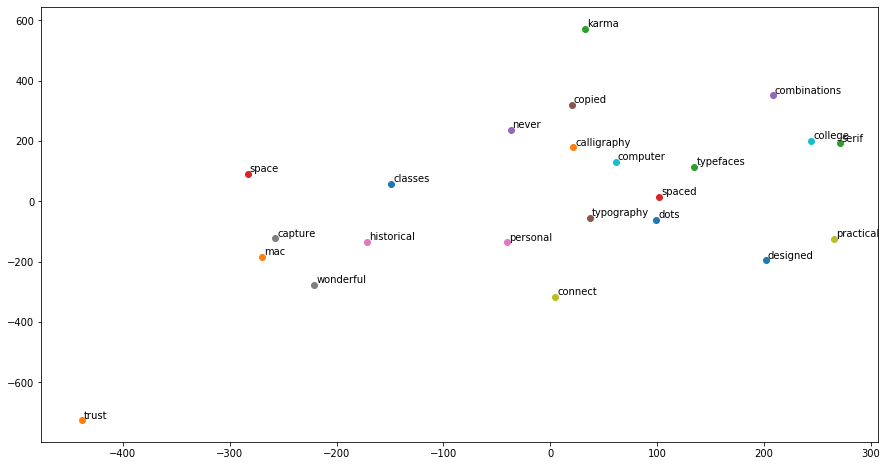

In [12]:
from sklearn.manifold import  TSNE
vocab = ['classes','calligraphy','serif','space','combinations','typography','historical','capture','practical','computer',
         'designed','mac','typefaces','spaced','never','copied','personal','wonderful','connect','college','dots','trust',
         'karma']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)